# Clasificador mediante Naive Bayes


In [167]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #dividir datasets 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

### Carga de informacion csv en un dataframe

In [169]:
dataframe = pd.read_csv(r"C:/Archivos/house-votes-84.data.csv",names = ['clase','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p'])
dataframe.shape
print('filas y columnas: ', dataframe.shape)
print(dataframe.groupby('clase').size())

filas y columnas:  (435, 17)
clase
democrat      267
republican    168
dtype: int64


Verificacion si los datos fueron cargados apropiadamente

In [75]:
dataframe.head(10)

,clase,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


### preprocesamiento de la informacion

transformacion de valores de etiquetas a valores numericos

In [171]:
data=dataframe.apply(LabelEncoder().fit_transform)
 
print(data.head(10))

   clase  a  b  c  d  e  f  g  h  i  j  k  l  m  n  o  p
0      1  1  2  1  2  2  2  1  1  1  2  0  2  2  2  1  2
1      1  1  2  1  2  2  2  1  1  1  1  1  2  2  2  1  0
2      0  0  2  2  0  2  2  1  1  1  1  2  1  2  2  1  1
3      0  1  2  2  1  0  2  1  1  1  1  2  1  2  1  1  2
4      0  2  2  2  1  2  2  1  1  1  1  2  0  2  2  2  2
5      0  1  2  2  1  2  2  1  1  1  1  1  1  2  2  2  2
6      0  1  2  1  2  2  2  1  1  1  1  1  1  0  2  2  2
7      1  1  2  1  2  2  2  1  1  1  1  1  1  2  2  0  2
8      1  1  2  1  2  2  2  1  1  1  1  1  2  2  2  1  2
9      0  2  2  2  1  1  1  2  2  2  1  1  1  1  1  0  0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001413D56DB70>,
      dtype=object)

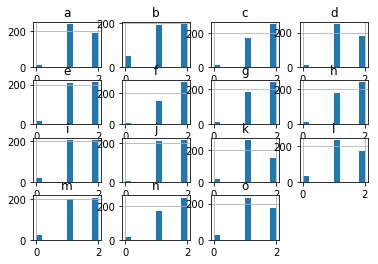

In [125]:
data.hist(data.columns[1:16]) # validamos si los datos estan mas o menos equilibrados

In [126]:
data.describe()

,clase,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.386207,1.402299,1.337931,1.556322,1.381609,1.452874,1.60000,1.517241,1.521839,1.425287,1.480460,1.296552,1.321839,1.422989,1.531034,1.335632,1.379310
std,0.487440,0.544342,0.667418,0.545974,0.535928,0.563449,0.53967,0.561065,0.564998,0.588527,0.531462,0.553049,0.601347,0.599866,0.572671,0.593742,0.845718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### division del conjunto de datos en entrenamiento y pruebas

Vamos a hacer la division de los datos

In [148]:
# Split data in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=89) 
y_train = X_train["clase"]
y_test = X_test["clase"]
X_train = X_train.drop('clase',1)  #eliminamos la clase en el dataframe 
X_test = X_test.drop('clase',1)

print('conjunto prueba: ',X_test.shape)
print('conjunto entrenamiento: ', X_train.shape)
print('conjunto labels prueba: ', y_test.shape)
print('conjunto labels entrenamiento: ', y_train.shape)

conjunto prueba:  (87, 16)
conjunto entrenamiento:  (348, 16)
conjunto labels prueba:  (87,)
conjunto labels entrenamiento:  (348,)


### Creacion y entrenamiento del clasificador

Con este hemos terminamos el preprocesamiento de la informacion, ya los datos estan listos para realizar el modelamiento con Naive Bayes.

Ahora vamos a crear el modelo Gaussian Naive Bayes con SKLearn para ello utilizamos la clase GaussianNB() de sklearn.naive_bayes

In [172]:
gnb = GaussianNB()
gnb.fit(X_train, y_train) #hemos entrenado el modelo, con los datos de entrenamiento 

GaussianNB(priors=None)

**prediccion con los datos de test** 

Vamos a realizar una prediccion con los datos de test para analizar la veracidad de nuestro modelo. 

In [158]:
y_pred = gnb.predict(X_test)


[1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 1 1 1 1 0 0]


### Evaluacion del modelo por medio de diferentes metricas

comprobamos la exactitud de nuestro modelo en este caso 91% lo cual es un valor muy alto 

In [160]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9080459770114943


Vamos a ver la matriz de confusion de nuestro modelo

In [161]:
confusion_matrix(y_test, y_pred)

array([[51,  6],
       [ 2, 28]], dtype=int64)

Viendo la matriz de confusion nos damos cuenta que la mayoria de los resultados caen en la horizontal lo cual es un excelente pronostico para nuestro modelo, 

**Tenemos 2 falsos negativos y 6 falsos positivos** 

In [173]:
print ('\nClasification report:\n', classification_report(y_test, y_pred))


Clasification report:
              precision    recall  f1-score   support

          0       0.96      0.89      0.93        57
          1       0.82      0.93      0.87        30

avg / total       0.91      0.91      0.91        87

